# Assignment_2
## Part1
### Task 1 & 2

In [67]:
import device

from train_mlp_numpy import train as train_numpy
from pytorch_train_mlp import train as train_pytorch

dnn_hidden_units = '20'
learning_rate = 1e-3
max_steps = 500
eval_freq = 10
use_stochastic = False

In [68]:
import numpy as np
from matplotlib import pyplot as plt

numpy_train_accuracies, numpy_test_accuracies = train_numpy(dnn_hidden_units, learning_rate, max_steps, eval_freq, use_stochastic)
pytorch_train_accuracies, pytorch_test_accuracies = train_pytorch(dnn_hidden_units, learning_rate, max_steps, eval_freq)


Step: 0, Loss: 0.6917895875661766, Test Loss: 0.6934952562601515, Test Accuracy: 44.5%
Step: 10, Loss: 0.6192509913839945, Test Loss: 0.6138616049320311, Test Accuracy: 76.0%
Step: 20, Loss: 0.42881900289485386, Test Loss: 0.35347059435980055, Test Accuracy: 81.0%
Step: 30, Loss: 0.1982089353573838, Test Loss: 0.30766110212045394, Test Accuracy: 82.5%
Step: 40, Loss: 0.21166940589848512, Test Loss: 0.29973950948915923, Test Accuracy: 83.5%
Step: 50, Loss: 0.2113450670417597, Test Loss: 0.298403146298499, Test Accuracy: 84.0%
Step: 60, Loss: 0.20134225197492817, Test Loss: 0.2980274148732453, Test Accuracy: 84.0%
Step: 70, Loss: 0.0944009941334383, Test Loss: 0.2990553804296222, Test Accuracy: 84.5%
Step: 80, Loss: 0.3008613533054373, Test Loss: 0.29874292277217096, Test Accuracy: 84.5%
Step: 90, Loss: 0.33718127907713014, Test Loss: 0.2985208583593037, Test Accuracy: 84.0%
Step: 100, Loss: 0.21318942078052064, Test Loss: 0.2984972825366316, Test Accuracy: 84.0%
Step: 110, Loss: 0.10417

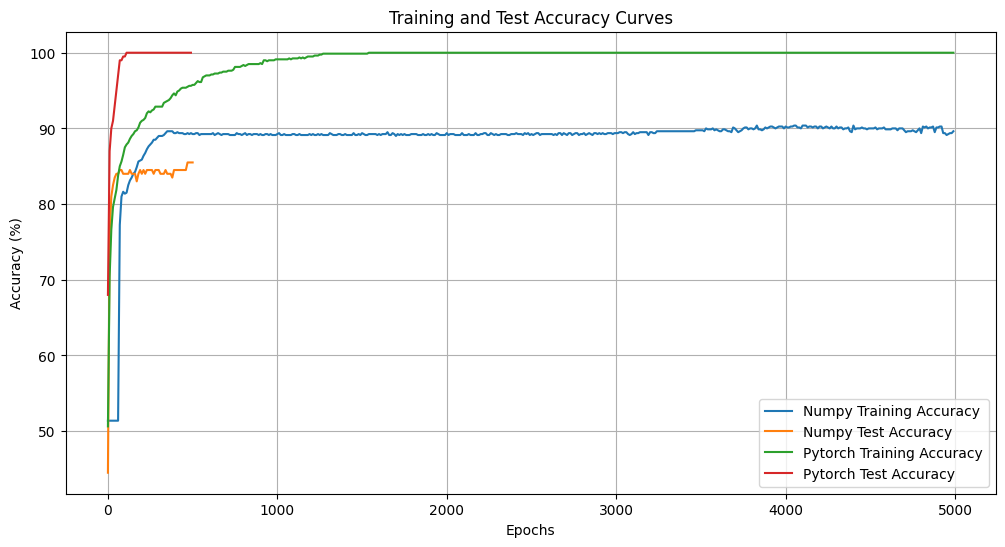

In [69]:
pytorch_train_accuracies = np.array(pytorch_train_accuracies) * 100
pytorch_test_accuracies = np.array(pytorch_test_accuracies) * 100

# pytorch_train_accuracies = [accuracy * 100 for accuracy in pytorch_train_accuracies]
# pytorch_test_accuracies = [accuracy * 100 for accuracy in pytorch_test_accuracies]

# 绘制训练和测试准确率曲线
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(numpy_train_accuracies)) * eval_freq, numpy_train_accuracies, label='Numpy Training Accuracy')
plt.plot(np.arange(len(numpy_test_accuracies)) * eval_freq, numpy_test_accuracies, label='Numpy Test Accuracy')
plt.plot(np.arange(len(pytorch_train_accuracies)) * eval_freq, pytorch_train_accuracies, label='Pytorch Training Accuracy')
plt.plot(np.arange(len(pytorch_test_accuracies)) * eval_freq, pytorch_test_accuracies, label='Pytorch Test Accuracy')

plt.title('Training and Test Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid()
plt.show()

### Task 3

In [30]:
import torch
print(f"torch version: {torch.__version__}")
print(f"torch cuda: {torch.cuda.is_available()}")

torch version: 2.5.1+cpu
torch cuda: False


In [31]:
learning_rate = 1e-3
max_steps = 100
eval_freq = 10
batch_size = 64

In [32]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split
from train_cifar10 import FNN, train_model
from utils import plot_and_evaluate

In [33]:
# Load the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize images
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


# Split the trainset into training and validation
train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size
train_data, val_data = random_split(trainset, [train_size, val_size])

trainloader = DataLoader(train_data, batch_size=64, shuffle=True)
valloader = DataLoader(val_data, batch_size=64, shuffle=False)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


#### Adam (lr=0.001, EPOCH=10)

In [34]:
# Initialize model, loss function, and optimizer
model = FNN()

# Cross entropy loss for multi-class classification
criterion = torch.nn.CrossEntropyLoss()

# Optimizer (adam)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 10
train_losses, train_acc, val_losses, val_acc = train_model(model, trainloader, valloader, optimizer, criterion, epochs)

Epoch 1/10, Train Loss: 1.7713, Train Accuracy: 36.84%, Val Loss: 1.5996, Val Accuracy: 44.02%
Epoch 2/10, Train Loss: 1.6195, Train Accuracy: 42.61%, Val Loss: 1.5159, Val Accuracy: 46.61%
Epoch 3/10, Train Loss: 1.5520, Train Accuracy: 44.85%, Val Loss: 1.4830, Val Accuracy: 47.80%
Epoch 4/10, Train Loss: 1.5066, Train Accuracy: 46.65%, Val Loss: 1.4637, Val Accuracy: 48.31%
Epoch 5/10, Train Loss: 1.4686, Train Accuracy: 48.14%, Val Loss: 1.4508, Val Accuracy: 49.06%
Epoch 6/10, Train Loss: 1.4449, Train Accuracy: 48.87%, Val Loss: 1.4392, Val Accuracy: 49.33%
Epoch 7/10, Train Loss: 1.4167, Train Accuracy: 50.02%, Val Loss: 1.4323, Val Accuracy: 48.70%
Epoch 8/10, Train Loss: 1.3903, Train Accuracy: 50.57%, Val Loss: 1.4089, Val Accuracy: 50.40%
Epoch 9/10, Train Loss: 1.3687, Train Accuracy: 51.55%, Val Loss: 1.3938, Val Accuracy: 50.39%
Epoch 10/10, Train Loss: 1.3455, Train Accuracy: 52.03%, Val Loss: 1.3803, Val Accuracy: 51.55%


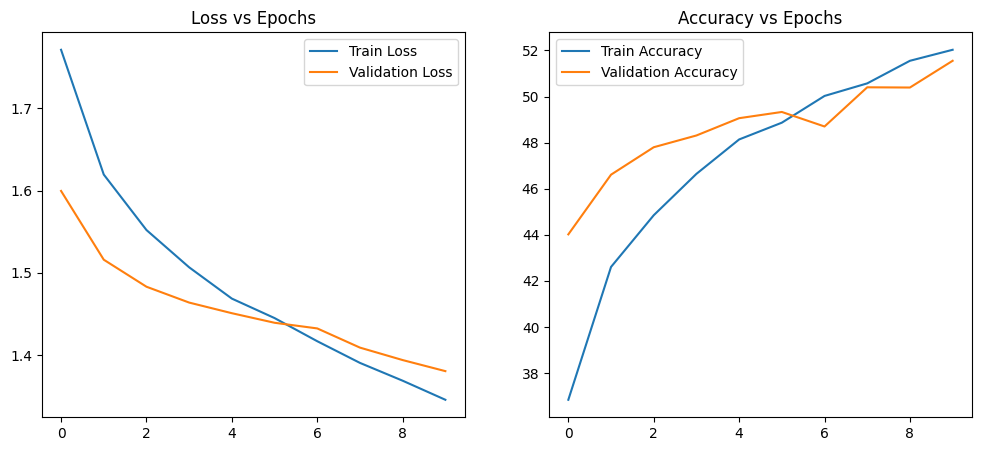

Test Accuracy: 51.21%


In [35]:
plot_and_evaluate(model, train_losses, train_acc, val_losses, val_acc, testloader)

#### SGD (lr=0.01, momentum=0.9, EPOCH=10)

In [36]:
# Initialize model, loss function, and optimizer
model = FNN()

# Cross entropy loss for multi-class classification
criterion = torch.nn.CrossEntropyLoss()

# Optimizer (SGD)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Train the model
epochs = 10
train_losses, train_acc, val_losses, val_acc = train_model(model, trainloader, valloader, optimizer, criterion, epochs)

Epoch 1/10, Train Loss: 1.8026, Train Accuracy: 35.77%, Val Loss: 1.6073, Val Accuracy: 43.13%
Epoch 2/10, Train Loss: 1.6109, Train Accuracy: 42.92%, Val Loss: 1.5009, Val Accuracy: 47.30%
Epoch 3/10, Train Loss: 1.5288, Train Accuracy: 45.88%, Val Loss: 1.4584, Val Accuracy: 48.44%
Epoch 4/10, Train Loss: 1.4732, Train Accuracy: 47.99%, Val Loss: 1.4117, Val Accuracy: 50.37%
Epoch 5/10, Train Loss: 1.4266, Train Accuracy: 49.19%, Val Loss: 1.3925, Val Accuracy: 51.12%
Epoch 6/10, Train Loss: 1.3913, Train Accuracy: 50.60%, Val Loss: 1.3993, Val Accuracy: 51.27%
Epoch 7/10, Train Loss: 1.3638, Train Accuracy: 51.64%, Val Loss: 1.3620, Val Accuracy: 52.17%
Epoch 8/10, Train Loss: 1.3354, Train Accuracy: 52.47%, Val Loss: 1.3453, Val Accuracy: 52.41%
Epoch 9/10, Train Loss: 1.3091, Train Accuracy: 53.58%, Val Loss: 1.3456, Val Accuracy: 52.67%
Epoch 10/10, Train Loss: 1.2873, Train Accuracy: 54.16%, Val Loss: 1.3231, Val Accuracy: 52.63%


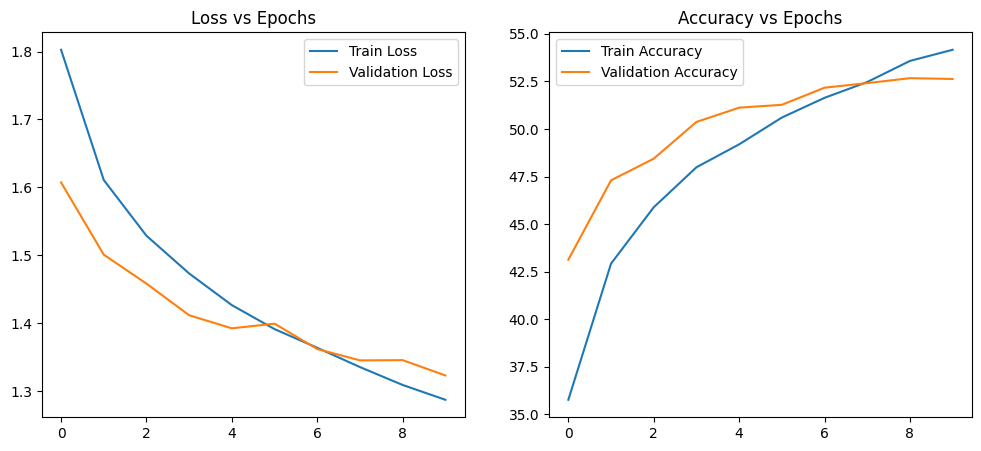

Test Accuracy: 53.21%


In [37]:
plot_and_evaluate(model, train_losses, train_acc, val_losses, val_acc, testloader)

From the line graph, in 10 epoch, Adam(lr=0.001) perform better than SGD(lr=0.01, momentum=0.9)

In [70]:
# Initialize model, loss function, and optimizer
model = FNN()

# Cross entropy loss for multi-class classification
criterion = torch.nn.CrossEntropyLoss()

# Optimizer (adam)
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Train the model
epochs = 20
train_losses, train_acc, val_losses, val_acc = train_model(model, trainloader, valloader, optimizer, criterion, epochs)

Epoch 1/20, Train Loss: 1.7533, Train Accuracy: 37.69%, Val Loss: 1.5711, Val Accuracy: 44.36%
Epoch 2/20, Train Loss: 1.5885, Train Accuracy: 43.91%, Val Loss: 1.4933, Val Accuracy: 47.61%
Epoch 3/20, Train Loss: 1.5174, Train Accuracy: 46.40%, Val Loss: 1.4664, Val Accuracy: 48.24%
Epoch 4/20, Train Loss: 1.4627, Train Accuracy: 48.31%, Val Loss: 1.4519, Val Accuracy: 49.09%
Epoch 5/20, Train Loss: 1.4185, Train Accuracy: 49.96%, Val Loss: 1.3894, Val Accuracy: 51.91%
Epoch 6/20, Train Loss: 1.3818, Train Accuracy: 51.03%, Val Loss: 1.3741, Val Accuracy: 51.44%
Epoch 7/20, Train Loss: 1.3481, Train Accuracy: 52.45%, Val Loss: 1.3820, Val Accuracy: 51.47%
Epoch 8/20, Train Loss: 1.3168, Train Accuracy: 53.23%, Val Loss: 1.3431, Val Accuracy: 52.96%
Epoch 9/20, Train Loss: 1.2853, Train Accuracy: 54.33%, Val Loss: 1.3343, Val Accuracy: 53.24%
Epoch 10/20, Train Loss: 1.2647, Train Accuracy: 55.33%, Val Loss: 1.3205, Val Accuracy: 54.31%
Epoch 11/20, Train Loss: 1.2395, Train Accuracy: 

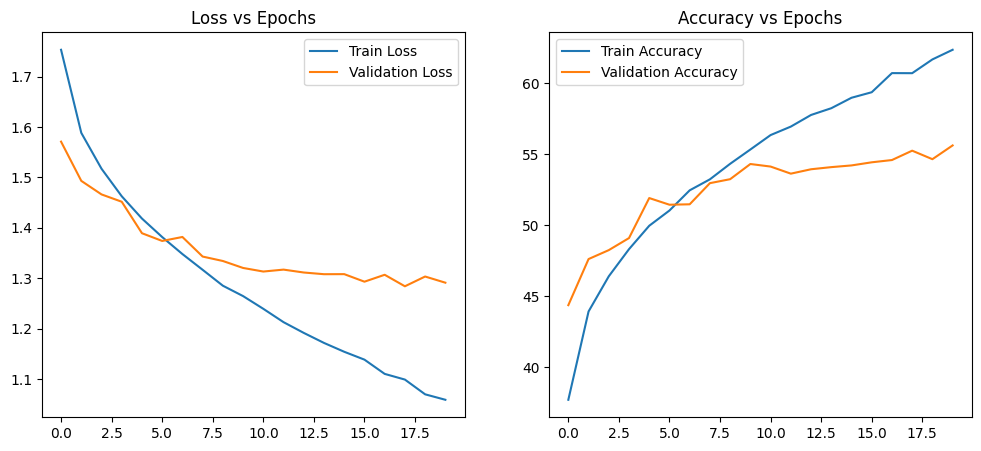

Test Accuracy: 55.52%


In [71]:
plot_and_evaluate(model, train_losses, train_acc, val_losses, val_acc, testloader)

#### SGD (lr=0.01--, momentum=0.9, EPOCH=10)

In [73]:
# Initialize model, loss function, and optimizer
model = FNN()

# Cross entropy loss for multi-class classification
criterion = torch.nn.CrossEntropyLoss()

# Optimizer (SGD)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)  # 每10轮减小学习率
# Train the model
epochs = 10
train_losses, train_acc, val_losses, val_acc = train_model(model, trainloader, valloader, optimizer, criterion, epochs)

Epoch 1/10, Train Loss: 1.8073, Train Accuracy: 35.47%, Val Loss: 1.5919, Val Accuracy: 43.34%
Epoch 2/10, Train Loss: 1.6071, Train Accuracy: 42.92%, Val Loss: 1.5077, Val Accuracy: 46.97%
Epoch 3/10, Train Loss: 1.5275, Train Accuracy: 46.02%, Val Loss: 1.4636, Val Accuracy: 48.45%
Epoch 4/10, Train Loss: 1.4701, Train Accuracy: 48.09%, Val Loss: 1.4034, Val Accuracy: 50.13%
Epoch 5/10, Train Loss: 1.4316, Train Accuracy: 49.27%, Val Loss: 1.3799, Val Accuracy: 51.53%
Epoch 6/10, Train Loss: 1.3950, Train Accuracy: 50.14%, Val Loss: 1.3867, Val Accuracy: 50.68%
Epoch 7/10, Train Loss: 1.3644, Train Accuracy: 51.40%, Val Loss: 1.3637, Val Accuracy: 51.76%
Epoch 8/10, Train Loss: 1.3360, Train Accuracy: 52.65%, Val Loss: 1.3603, Val Accuracy: 51.63%
Epoch 9/10, Train Loss: 1.3090, Train Accuracy: 53.83%, Val Loss: 1.3394, Val Accuracy: 52.65%
Epoch 10/10, Train Loss: 1.2800, Train Accuracy: 54.67%, Val Loss: 1.3161, Val Accuracy: 53.33%


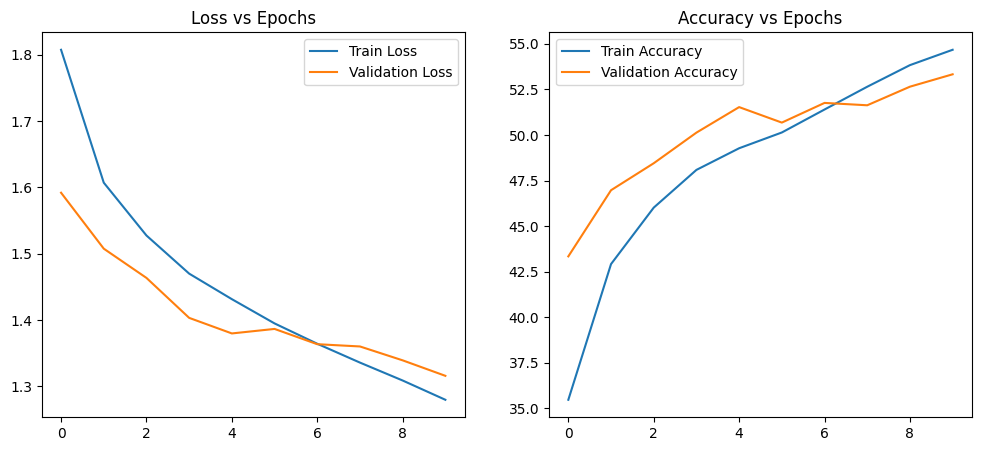

Test Accuracy: 53.30%


In [74]:
plot_and_evaluate(model, train_losses, train_acc, val_losses, val_acc, testloader)

In [88]:
from simpleCNN import SimpleCNN, train_model as train2
import torch.nn as nn

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalization based on ImageNet stats
])

# Download and load CIFAR-10 training and test datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# DataLoader for training and test datasets
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# for inputs, labels in trainloader:
#     print(f"inputs type: {type(inputs)}, labels type: {type(labels)}")  # 打印类型
#     inputs, labels = inputs.to(device), labels.to(device)

# Initialize the model
model = SimpleCNN()

# Loss function (cross entropy)
criterion = nn.CrossEntropyLoss()

# Optimizer (Adam optimizer)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Check for GPU availability and move model to GPU if possible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
# 用训练集和测试集训练模型，并记录损失和准确率
train_losses, train_acc, val_losses, val_acc = train2(model, trainloader, testloader, criterion, optimizer,
                                                           epochs)


Files already downloaded and verified
Files already downloaded and verified


TypeError: to() received an invalid combination of arguments - got (type), but expected one of:
 * (torch.device device = None, torch.dtype dtype = None, bool non_blocking = False, bool copy = False, *, torch.memory_format memory_format = None)
 * (torch.dtype dtype, bool non_blocking = False, bool copy = False, *, torch.memory_format memory_format = None)
 * (Tensor tensor, bool non_blocking = False, bool copy = False, *, torch.memory_format memory_format = None)


In [ ]:
plot_and_evaluate(model, train_losses, train_acc, val_losses, val_acc, testloader)